In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import numpy as np
from tensorflow.keras.applications import resnet50
import matplotlib.pyplot as plt


In [ ]:
import os
os.chdir("/content/drive/MyDrive/datasets/TRAIN")
!ls

cardboard  glass  metal  paper	plastic  trash


In [ ]:
import os
for dirname, _, filenames in os.walk('/datasets/TRAIN'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
garbage_path = "/content/drive/MyDrive/datasets/TRAIN"

In [ ]:
classes = os.listdir(garbage_path)
classes

['cardboard', 'plastic', 'glass', 'paper', 'trash', 'metal']

In [ ]:
image_size = (128, 128)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    garbage_path,
    validation_split=0.2,          
    subset="training",             
    seed=1337,                     
    image_size=image_size,         
    batch_size=batch_size,         
    label_mode="categorical",      
    class_names=classes
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    garbage_path,
    validation_split=0.2,
    subset="validation",          
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical",
    class_names=classes
)
train_ds


Found 2004 files belonging to 6 classes.
Using 1604 files for training.
Found 2004 files belonging to 6 classes.
Using 400 files for validation.


<BatchDataset shapes: ((None, 128, 128, 3), (None, 6)), types: (tf.float32, tf.float32)>

In [ ]:
!pip install resnet

In [ ]:
input_shape = (128, 128, 3)
in_width, in_height, in_channels = 128, 128, 3

pretrained_resnet = tf.keras.applications.ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(in_width, in_height, in_channels),
)
pretrained_resnet.trainable=False

In [ ]:
model = tf.keras.models.Sequential(
    [
        pretrained_resnet,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation="relu"),
     
        tf.keras.layers.Dense(50, activation="relu"),
        tf.keras.layers.Dense(6, activation="softmax")
    ]
)

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_4 (Flatten)         (None, 32768)             0         
                                                                 
 dense_11 (Dense)            (None, 100)               3276900   
                                                                 
 dense_12 (Dense)            (None, 50)                5050      
                                                                 
 dense_13 (Dense)            (None, 6)                 306       
                                                                 
Total params: 26,869,968
Trainable params: 3,282,256
Non-trainable params: 23,587,712
_________________________________________________________________
None


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, verbose=1, validation_data=val_ds)

Epoch 1/10
51/51 [==============================] - 16s 198ms/step - loss: 1.9813 - accuracy: 0.6110 - val_loss: 0.9067 - val_accuracy: 0.7225
Epoch 2/10
51/51 [==============================] - 9s 163ms/step - loss: 0.3006 - accuracy: 0.9002 - val_loss: 0.8001 - val_accuracy: 0.7350
Epoch 3/10
51/51 [==============================] - 9s 162ms/step - loss: 0.0764 - accuracy: 0.9794 - val_loss: 0.7486 - val_accuracy: 0.8025
Epoch 4/10
51/51 [==============================] - 9s 162ms/step - loss: 0.0374 - accuracy: 0.9925 - val_loss: 0.7572 - val_accuracy: 0.7825
Epoch 5/10
51/51 [==============================] - 9s 164ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.7683 - val_accuracy: 0.7975
Epoch 6/10
51/51 [==============================] - 9s 162ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.7684 - val_accuracy: 0.8075
Epoch 7/10
51/51 [==============================] - 9s 165ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.7842 - val_accuracy: 0.8050
Epoch

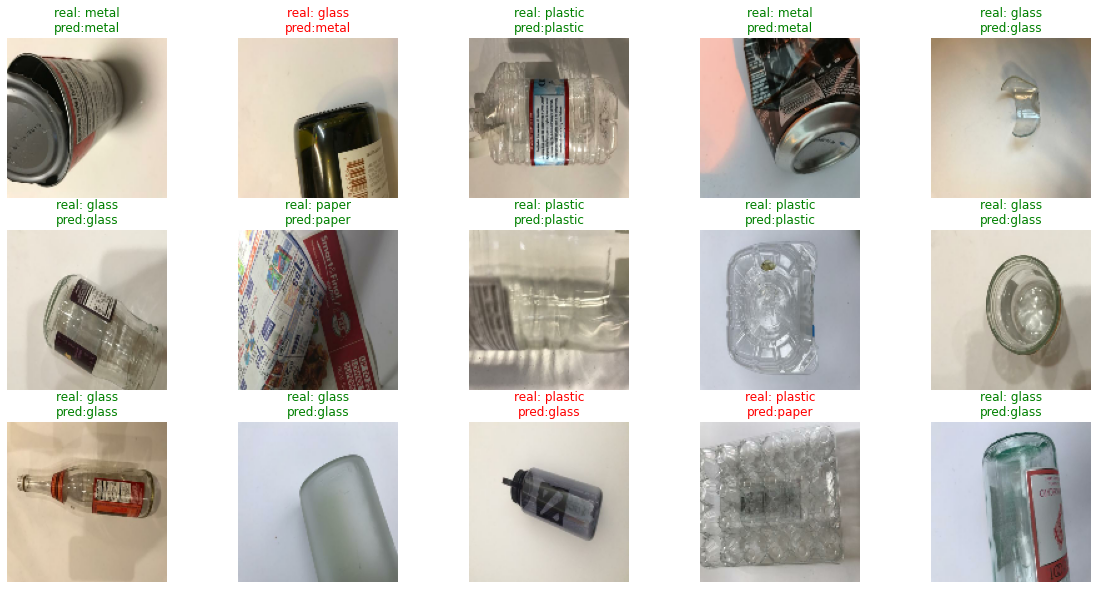

In [ ]:
plt.figure(figsize=(20, 10))
for images, labels in val_ds.take(1):
    for i in range(15):
        ax = plt.subplot(3, 5, i + 1)
        
        img_array = images[i].numpy().astype("uint8")
        prediction = model.predict(np.array([img_array]))
        prediction_name = classes[np.argmax(prediction)]
        real_name = classes[np.argmax(labels[i])]
        
        plt.imshow(img_array)
        if prediction_name == real_name:
            plt.title(f'real: {real_name}\npred:{prediction_name}', fontdict={'color': 'g'})
        else:
            plt.title(f'real: {real_name}\npred:{prediction_name}', fontdict={'color': 'r'})
        
        plt.axis("off")


In [ ]:
garbage_path1="/content/drive/MyDrive/datasets/TEST"

In [ ]:
import glob
from PIL import Image

In [ ]:
img_name=[]
cat=[]

from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [ ]:
for img in os.listdir('/content/drive/MyDrive/datasets/TEST'):
  img_path=os.path.join('/content/drive/MyDrive/datasets/TEST',img)
  image=load_img(img_path,target_size=(128,128))
  image=img_to_array(image)
  image=np.expand_dims(image,axis=0)

  result=model.predict(image)

  pred=classes[np.argmax(result)]
  img_name.append(img)
  cat.append(pred)


In [ ]:
import pandas as pd
dt={'Filename':img_name,'Labels':cat}
df=pd.DataFrame(dt)
df.to_csv('submit5.csv',index=False)